In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
d_t = 15.23  # throat diameter, mm (you'll calculate actual value)
epsilon = 3.38  # Expansion ratio, Ae/At (from CEA)
theta_n = 30  # initial expansion angle at throat, degrees
theta_e = 8   # exit angle, degrees
length_coefficient = 0.8

In [3]:
d_e = d_t * np.sqrt(epsilon)  # exit diameter

# Reference conical length
L_cone = (d_e - d_t) / (2 * np.tan(np.radians(theta_e)))
L_bell = length_coefficient * L_cone

# Normalized coordinate
x = np.linspace(0, L_bell, 5000)
xi = x / L_bell

# Quadratic transition from theta_n to theta_e
theta = theta_n - (theta_n - theta_e) * xi**0.5  # angle at each point in degrees

# Integrate to get radius
r = np.zeros_like(x)
r[0] = d_t / 2
for i in range(1, len(x)):
    dr = (x[i] - x[i-1]) * np.tan(np.radians(theta[i]))
    r[i] = r[i-1] + dr

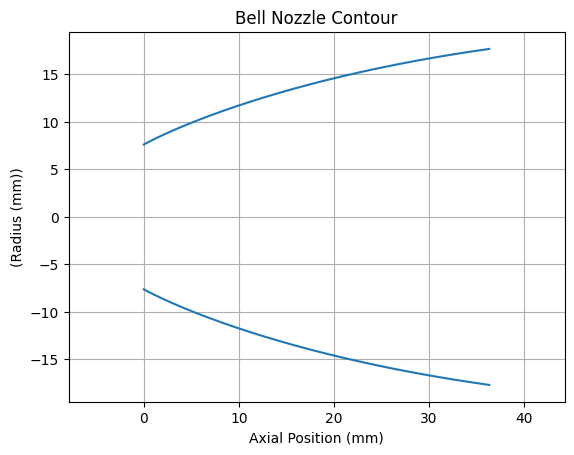

In [4]:
fig, ax = plt.subplots()
ax.plot(x, r, label='_nolegend_', color='C0')
ax.plot(x, -1*r, label='_nolegend_', color='C0')  # mirror for lower half

ax.set_xlabel('Axial Position (mm)')
ax.set_ylabel('(Radius (mm))')
ax.set_title('Bell Nozzle Contour')
ax.axis('equal')
ax.grid(True)
plt.show()